In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [5]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(acc)

0.9298245614035088


In [6]:
pd.Series(y).value_counts()

1    357
0    212
Name: count, dtype: int64

In [7]:
pd.Series(y_test).value_counts()

1    72
0    42
Name: count, dtype: int64

In [8]:
y_pred = model.predict(X_test)

In [9]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report:
               precision    recall  f1-score   support

   malignant       0.89      0.93      0.91        42
      benign       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114




Confusion Matrix:
 [[39  3]
 [ 5 67]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.89      0.93      0.91        42
      benign       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



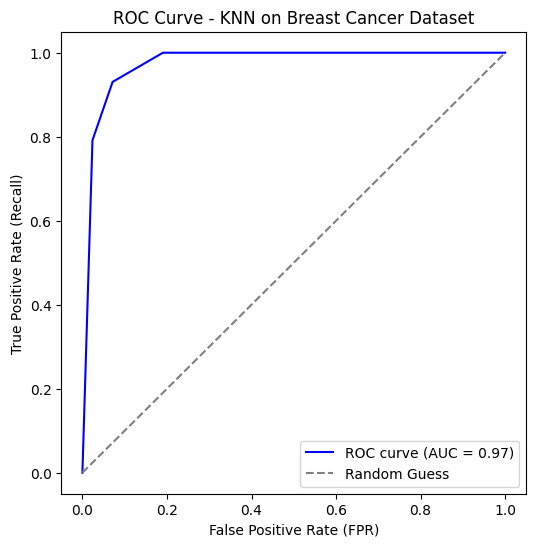

In [10]:
y_pred = model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# 5. ROC and AUC
y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1 (malignant)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - KNN on Breast Cancer Dataset")
plt.legend(loc="lower right")
plt.show()

In [11]:
y_prob = model.predict_proba(X_test)[:, 1]

In [13]:
print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

[[34  8]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        42
           1       0.90      1.00      0.95        72

    accuracy                           0.93       114
   macro avg       0.95      0.90      0.92       114
weighted avg       0.94      0.93      0.93       114



In [14]:
from sklearn.metrics import precision_recall_curve, average_precision_score

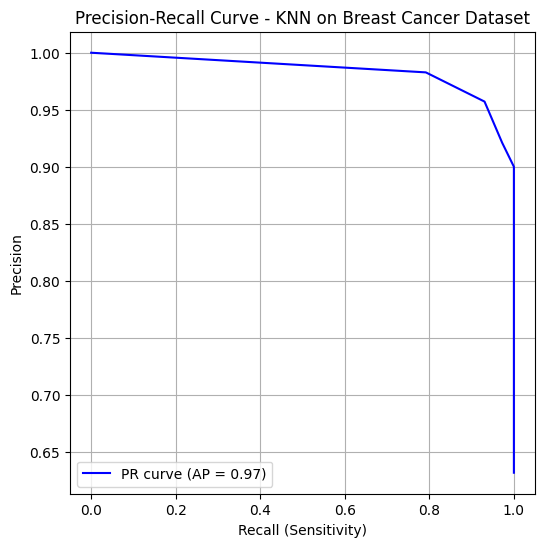

In [15]:
y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
avg_prec = average_precision_score(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', label=f'PR curve (AP = {avg_prec:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN on Breast Cancer Dataset')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

Best threshold with 0 False Negatives: 0.20
FP at this threshold: 8, FN: 0


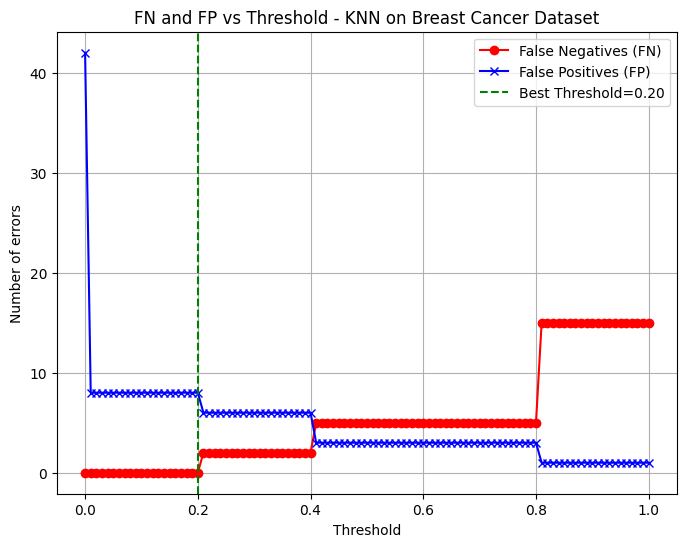

In [21]:
thresholds = np.arange(0, 1.01, 0.01)
fn_list = []
fp_list = []

best_threshold = 0.0
best_fn = None
best_fp = None

for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    fn = cm[1, 0]  # False Negatives
    fp = cm[0, 1]  # False Positives
    fn_list.append(fn)
    fp_list.append(fp)
    
    # Update best threshold: last threshold where FN = 0
    if fn == 0:
        best_threshold = t
        best_fn = fn
        best_fp = fp

print(f"Best threshold with 0 False Negatives: {best_threshold:.2f}")
print(f"FP at this threshold: {best_fp}, FN: {best_fn}")

# Plot FN and FP vs threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fn_list, label='False Negatives (FN)', color='red', marker='o')
plt.plot(thresholds, fp_list, label='False Positives (FP)', color='blue', marker='x')
plt.axvline(x=best_threshold, color='green', linestyle='--', label=f'Best Threshold={best_threshold:.2f}')



plt.xlabel('Threshold')
plt.ylabel('Number of errors')
plt.title('FN and FP vs Threshold - KNN on Breast Cancer Dataset')
plt.legend()
plt.grid(True)
plt.show()